## Correlation matrix

In [ ]:
from image_text_model.im_text_rnn_model import correlation_matrix

nb_batches = 781
checkpoint_dir = 'image_text_model/deep_sentiment_model'
posts_logits, posts_labels = correlation_matrix(nb_batches, checkpoint_dir)

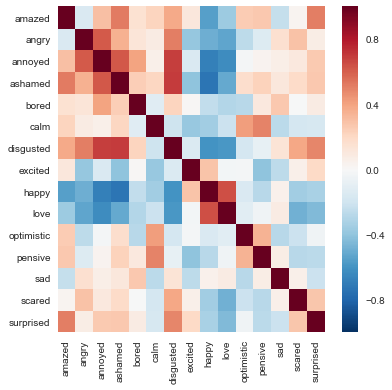

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datasets.dataset_utils import read_label_file
%matplotlib inline

posts_logits = np.load('data/posts_logits.npy')
posts_logits = posts_logits[:, range(9) + range(10, 16)]
labels_dict = read_label_file('data', 'photos', filename='labels_all_15.txt')
corr_matrix = np.corrcoef(posts_logits, rowvar=False)

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix, ax=ax)
graph_labels = [(int)(item.get_text()) for item in ax.get_xticklabels()]
ax.set_xticklabels(map(lambda x: labels_dict[x], graph_labels))
ax.set_yticklabels(map(lambda x: labels_dict[x], graph_labels[::-1]))
plt.xticks(rotation=90)
plt.yticks(rotation=0)
#plt.savefig('plots/correlation_matrix.png', dpi=300)
plt.show()

//anaconda/envs/tensorflow/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


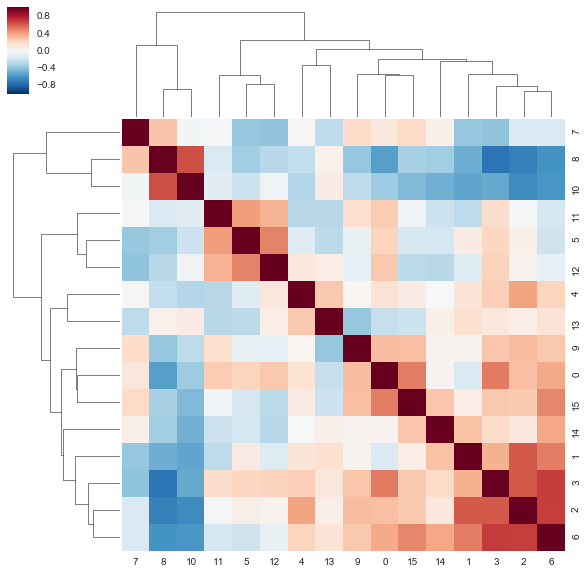

In [2]:
cg = sns.clustermap(corr_matrix)
#for i, ax in enumerate(cg.fig.axes):   # get all axes of the fig object
    #graph_labels = [(int)(item.get_text()) for item in ax.get_xticklabels()]
    #ax.set_xticklabels(map(lambda x: labels_dict[x], graph_labels), rotation=90)
    #ax.set_yticklabels(map(lambda x: labels_dict[x], graph_labels[::-1]), rotation=0)
plt.savefig('plots/dendogram2.png', dpi=300)
plt.show()

#import scipy.spatial as sp
#linkage1 = linkage(sp.distance.squareform(1 - corr_matrix, checks=False), method='average')
#sns.clustermap(1 - corr_matrix, row_linkage=linkage1, col_linkage=linkage1)

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(corr_matrix, 'ward')

In [20]:
0.7*max(Z[:,2])

3.7386627944186364

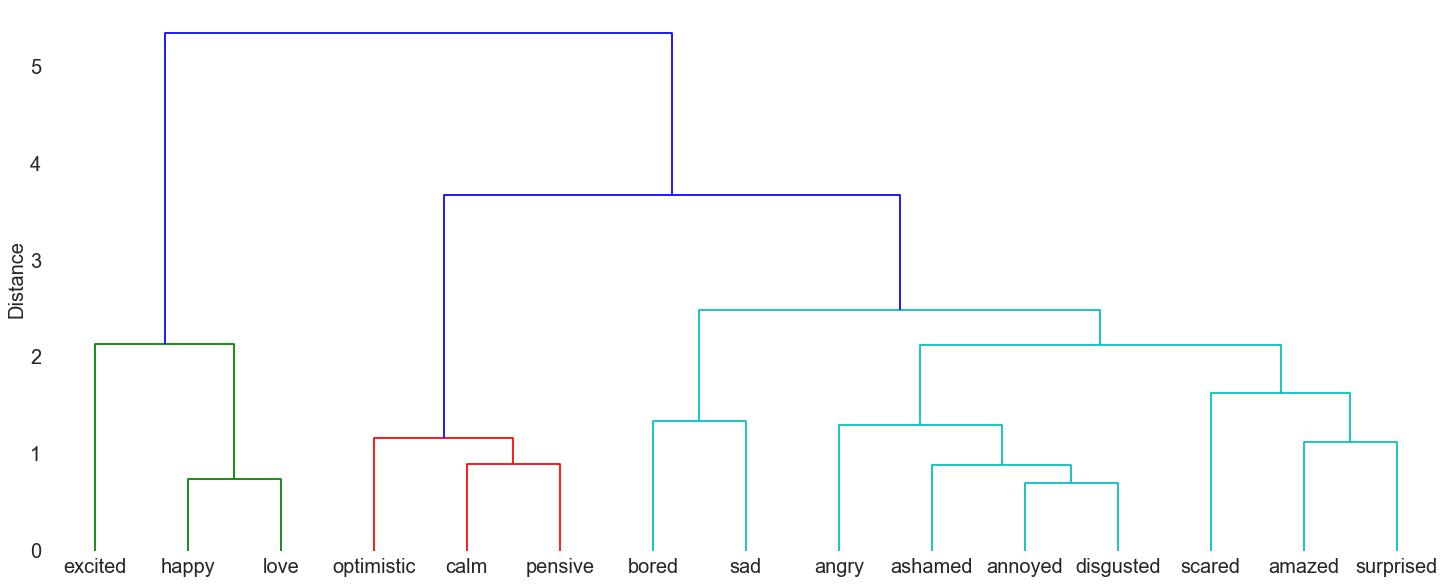

In [42]:
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111)
ax.set_facecolor('white')
plt.ylabel('Distance')
R = dendrogram(Z, color_threshold=3,
               leaf_font_size=20,  # font size for the x axis labels
               labels=labels_dict.values())
ax.yaxis.label.set_size(20)
for label in (ax.get_yticklabels()):
    label.set_fontsize(20)
ax.grid(False)
plt.savefig('plots/dendrogram_clean.png', dpi=300)
plt.show()

## PCA/MDS

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datasets.dataset_utils import read_label_file
%matplotlib inline

random_seed = 0
posts_logits = np.load('data/posts_logits.npy')
posts_labels = np.load('data/posts_labels.npy')
labels_dict = read_label_file('data', 'photos', filename='labels_all.txt')

np.random.seed(random_seed)
nb_samples = 1000
indices = np.random.choice(posts_logits.shape[0], nb_samples, replace=False)
posts_logits = posts_logits[indices]
posts_labels = posts_labels[indices]

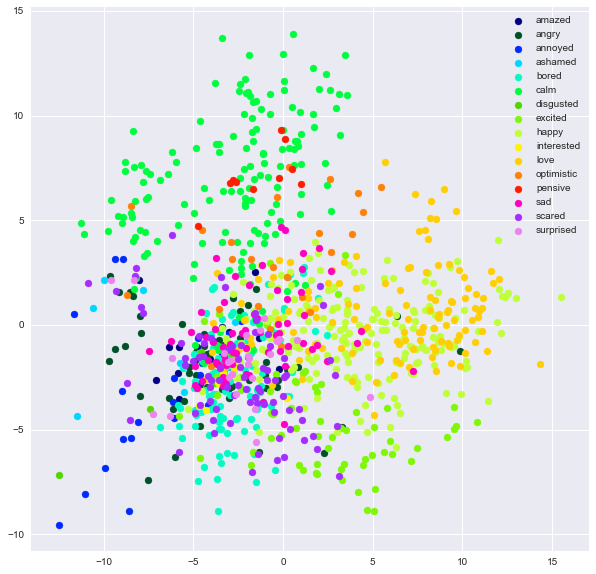

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_points = pca.fit_transform(posts_logits)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
for label in labels_dict.keys():
    mask = posts_labels == label
    ax.scatter(pca_points[mask, 0], pca_points[mask, 1], label=labels_dict[label])
colormap = plt.cm.gist_ncar#nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9, len(ax.collections))]       
for t, j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

ax.legend()
plt.show()

In [35]:
pca.explained_variance_ratio_

array([ 0.32345985,  0.20708169,  0.11011482])

In [15]:
from sklearn.manifold import MDS

# image with random_satate 9 and 1000 points
mds = MDS(n_components=3, random_state=9)
mds_points = mds.fit_transform(posts_logits)

In [22]:
mds.stress_

1508884.8556918781

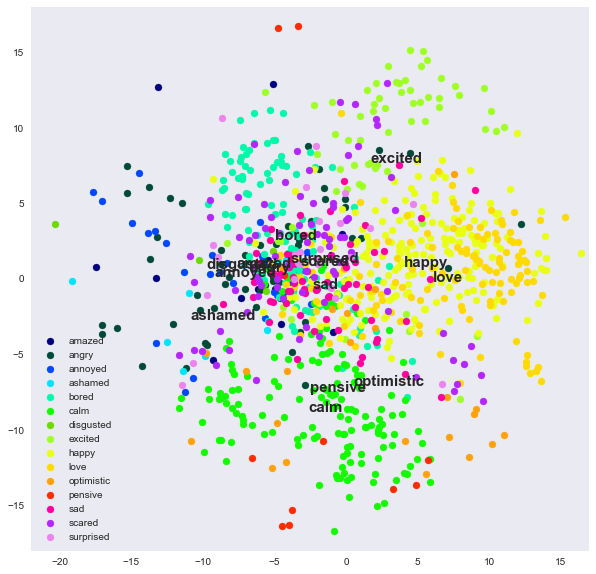

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
for label in labels_dict.keys():
    mask = posts_labels == label
    if labels_dict[label] != 'interested':
        ax.scatter(-mds_points[mask, 0], mds_points[mask, 1], label=labels_dict[label])
        ax.annotate(labels_dict[label], (-mds_points[mask, 0].mean() - 0.8, mds_points[mask, 1].mean() - 0.5), 
                    size=15, fontweight='bold')
colormap = plt.cm.gist_ncar 
colorst = [colormap(i) for i in np.linspace(0, 0.9, len(ax.collections))]       
for t, j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

ax.legend()
ax.grid(False)
#plt.savefig('plots/mds.png', dpi=300)
plt.show()

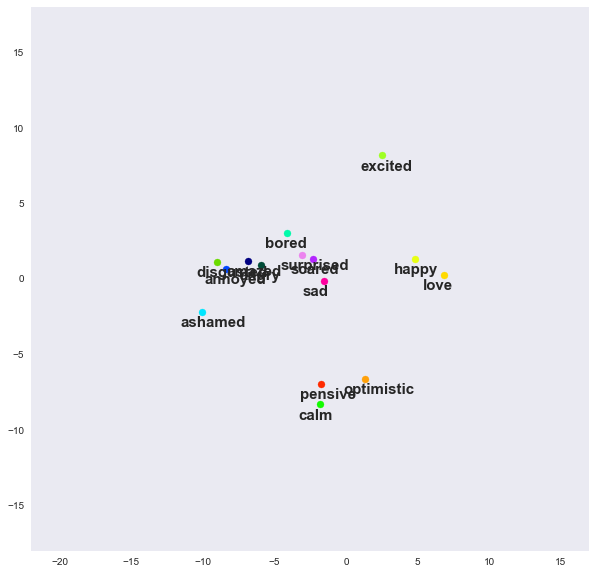

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
for label in labels_dict.keys():
    mask = posts_labels == label
    if labels_dict[label] != 'interested':
        ax.scatter(-mds_points[mask, 0].mean(), mds_points[mask, 1].mean(), label=labels_dict[label])
        ax.annotate(labels_dict[label], (-mds_points[mask, 0].mean() - 0.8, mds_points[mask, 1].mean() - 0.5), 
                    size=15, fontweight='bold')
colormap = plt.cm.gist_ncar 
colorst = [colormap(i) for i in np.linspace(0, 0.9, len(ax.collections))]       
for t, j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

#ax.legend()
ax.grid(False)
#ax.set_xlim(-22, 17)
#ax.set_ylim(-18, 18)
#plt.savefig('plots/mds-centers.png', dpi=300)
plt.show()

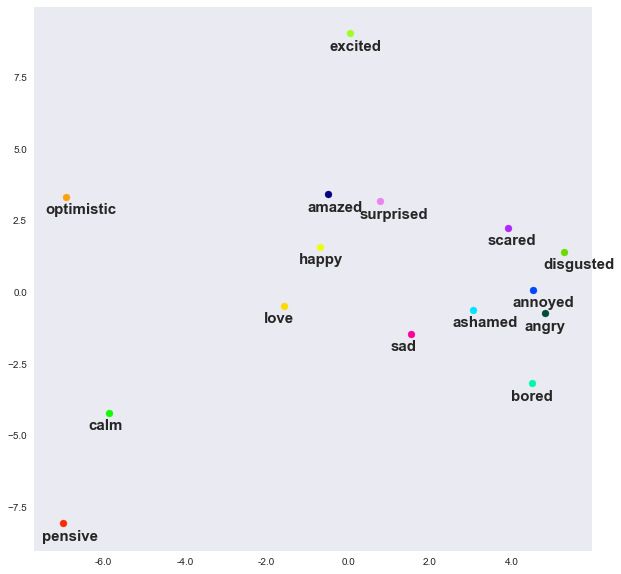

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
for label in labels_dict.keys():
    mask = posts_labels == label
    if labels_dict[label] != 'interested':
        ax.scatter(-mds_points[mask, 1].mean(), -mds_points[mask, 2].mean(), label=labels_dict[label])
        ax.annotate(labels_dict[label], (-mds_points[mask, 1].mean() - 0.5, -mds_points[mask, 2].mean() - 0.6), 
                    size=15, fontweight='bold')
colormap = plt.cm.gist_ncar 
colorst = [colormap(i) for i in np.linspace(0, 0.9, len(ax.collections))]       
for t, j1 in enumerate(ax.collections):
    j1.set_color(colorst[t])

#ax.legend()
ax.grid(False)
from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.savefig('plots/mds-centers-2vs3.png', dpi=300)
plt.show()

In [ ]:
More on manifold learning here: https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

## Top words for each emotion

In [1]:
import os
import operator

import numpy as np
import pandas as pd
from text_model.text_preprocessing import _load_embedding_weights_glove, preprocess_one_df
from image_text_model.im_text_rnn_model import word_most_relevant
from datasets.dataset_utils import read_label_file

emotions = ['happy', 'sad', 'scared', 'angry', 'surprised', 'disgusted', 'annoyed', 'bored', 
'love', 'calm', 'amazed', 'optimistic', 'pensive', 'ashamed', 'excited'] #removed interested

df_dict = dict()

text_dir = 'text_model'
emb_dir = 'embedding_weights'
filename = 'glove.6B.50d.txt'
vocabulary, embedding = _load_embedding_weights_glove(text_dir, emb_dir, filename)
_POST_SIZE = 50
    
for emotion in emotions:
    df = preprocess_one_df(vocabulary, embedding, emotion, _POST_SIZE)
    df_dict[emotion] = df
    
columns = [u'id', u'post_url', u'type', u'timestamp',
           u'date', u'tags', u'liked', u'note_count',
           u'photo', u'text', u'search_query', u'text_list',
           u'text_len']
df_all = pd.DataFrame(columns = [])

for emotion in emotions:
    df_all = pd.concat([df_all, df_dict[emotion]]).reset_index(drop=True)

Finished loading word embedding weights.


In [40]:
# Get top 1000 most occurring words
vocabulary_count = dict(zip(vocabulary, np.zeros(len(vocabulary), dtype=np.int32)))
for i in range(df_all.shape[0]):
    for word in df_all['text'][i].lower().split():
        if word in vocabulary_count:
            vocabulary_count[word] += 1

In [42]:
import operator
nb_top_words = 1000
most_frequent_words = sorted(vocabulary_count.items(), key=operator.itemgetter(1), reverse=True)[:nb_top_words]

word_to_id = dict(zip(vocabulary, range(len(vocabulary))))
id_most_frequent_words = [word_to_id[x[0]] for x in most_frequent_words]

In [3]:
labels_dict = read_label_file('data', 'photos')
top_words = [41,
 4,
 0,
 5,
 7,
 81,
 3,
 192,
 6,
 12,
 14,
 20,
 285,
 10,
 100,
 34]
num_classes = 7#len(labels_dict)
checkpoint_dir = 'image_text_model/deep_sentiment_model'
#scores, vocabulary, word_to_id = word_most_relevant(top_words, num_classes, checkpoint_dir)

Finished loading word embedding weights.


In [43]:
#######
## Analyse scores
######
import numpy as np
from text_model.text_preprocessing import _load_embedding_weights_glove
from datasets.dataset_utils import read_label_file

labels_dict = read_label_file('data', 'photos', filename='labels_all.txt')

text_dir = 'text_model'
emb_dir = 'embedding_weights'
filename = 'glove.6B.50d.txt'
vocabulary, embedding = _load_embedding_weights_glove(text_dir, emb_dir, filename)

word_to_id = dict(zip(vocabulary, range(len(vocabulary))))
id_to_word = {value:key for key, value in word_to_id.items()}
scores = np.load('data/top_words_scores.npy')
top_words = np.load('data/top_words.npy')

Finished loading word embedding weights.


In [9]:
labels_dict

{0: u'amazed',
 1: u'angry',
 2: u'annoyed',
 3: u'ashamed',
 4: u'bored',
 5: u'calm',
 6: u'disgusted',
 7: u'excited',
 8: u'happy',
 9: u'interested',
 10: u'love',
 11: u'optimistic',
 12: u'pensive',
 13: u'sad',
 14: u'scared',
 15: u'surprised'}

In [62]:
import numpy as np
import operator

emotion_index = 12
relevant_words_emotion = sorted(zip(range(scores.shape[0]), scores[:, emotion_index]), key=operator.itemgetter(1), reverse=True)[:60]
relevant_words_emotion = [x[0] for x in relevant_words_emotion]

print(labels_dict[emotion_index].title())
print(', '.join(map(lambda x: id_to_word[x], top_words[relevant_words_emotion])))

Pensive
mood, wrote, quiet, view, il, trending, ive, sadness, thoughts, calm, words, sad, kissed, depression, de, text, –, voice, y, e, lonely, del, soul, by, read, truth, sounds, middle, peace, listening, late, followers, sense, writing, via, photos, lovely, sat, early, cried, los, house, later, 7, memories, date, tumblr, che, emotional, post, looked, sound, no., cant, deep, write, between, relationship, la, bc


## DeepSentiment with fc layer

In [1]:
from image_text_model.im_text_rnn_model import train_deep_sentiment

checkpoints_dir = 'image_model/pretrained_model'
train_dir = 'image_text_model/deep_sentiment_model_2'
num_steps = 2
train_deep_sentiment(checkpoints_dir, train_dir, num_steps)

Finished loading word embedding weights.
Instructions for updating:
Use tf.losses.softmax_cross_entropy instead.
Instructions for updating:
Use tf.losses.compute_weighted_loss instead.
Instructions for updating:
Use tf.losses.add_loss instead.
Instructions for updating:
Use tf.losses.get_total_loss instead.
Instructions for updating:
Use tf.losses.get_losses instead.
Instructions for updating:
Use tf.losses.get_regularization_losses instead.
INFO:tensorflow:Starting Session.
INFO:tensorflow:Starting Queues.
INFO:tensorflow:global_step/sec: 0
New learning rate: 0.001
INFO:tensorflow:global step 1: loss = 2.7510 (53.36 sec/step)
INFO:tensorflow:global step 2: loss = 2.3407 (30.71 sec/step)
INFO:tensorflow:Stopping Training.
INFO:tensorflow:Finished training! Saving model to disk.
Finished training. Last batch loss 2.341


In [ ]:
from image_text_model.im_text_rnn_model import evaluate_deep_sentiment

checkpoint_dir = 'image_text_model/deep_sentiment_model_2'
log_dir = 'image_text_model/model_eval_2'
mode = 'train'
num_evals = 2
evaluate_deep_sentiment(checkpoint_dir, log_dir, mode, num_evals)

## Outlier detection

In [1]:
from image_text_model.im_text_rnn_model import outliers_detection

# change mode to validation and set nb_batches
####
checkpoint_dir = 'image_text_model/deep_sentiment_model'
#max_norms, max_post_ids, max_logits = outliers_detection(checkpoint_dir)

Finished loading word embedding weights.


In [3]:
max_logits.shape

(64, 8)

In [13]:
import numpy as np
import pandas as pd
from text_model.text_preprocessing import _load_embedding_weights_glove, preprocess_one_df
from datasets.dataset_utils import read_label_file

max_norms = np.load('data/max_norms.npy')
max_post_ids = np.load('data/max_post_ids.npy')
max_logits = np.load('data/max_logits.npy')

In [14]:
emotions = ['happy', 'sad', 'scared', 'angry', 'surprised', 'disgusted', 'annoyed', 'bored', 
'love', 'calm', 'amazed', 'optimistic', 'pensive', 'ashamed', 'excited'] #removed interested

df_dict = dict()

text_dir = 'text_model'
emb_dir = 'embedding_weights'
filename = 'glove.6B.50d.txt'
vocabulary, embedding = _load_embedding_weights_glove(text_dir, emb_dir, filename)
_POST_SIZE = 50
    
for emotion in emotions:
    df = preprocess_one_df(vocabulary, embedding, emotion, _POST_SIZE)
    df_dict[emotion] = df
    
columns = [u'id', u'post_url', u'type', u'timestamp',
           u'date', u'tags', u'liked', u'note_count',
           u'photo', u'text', u'search_query', u'text_list',
           u'text_len']
df_all = pd.DataFrame(columns = [])

for emotion in emotions:
    df_all = pd.concat([df_all, df_dict[emotion]]).reset_index(drop=True)

Finished loading word embedding weights.


In [15]:
max_norms

array([ 24.81094131,  31.53455432,  19.33407922,  24.13666359,
        25.18111405,  22.53102588,  18.51990164,  27.60309269,
        19.32530235,  24.06207722,  19.32190886,  27.23557926,
        25.49180141,  18.78869209,  20.43709473,  19.78191679,
        19.02611887,  28.86745329,  20.84486899,  27.25697563,
        22.03382655,  27.03099089,  17.90589382,  17.58497065,
        21.03819926,  27.31714045,  27.23557926,  18.29103806,
        24.77128505,  21.03819926,  26.97042953,  27.17567191,
        23.29982042,  25.79534177,  19.27793522,  20.36585927,
        18.70010828,  22.45708352,  18.94681717,  23.96817861,
        25.52794308,  24.52490562,  22.99854122,  24.75301317,
        23.93716081,  24.82214924,  24.55903595,  35.28317144,
        27.63249179,  21.89575801,  21.53365774,  20.76636758,
        27.99093116,  18.9653714 ,  20.21441852,  23.64234913,
        17.72166712,  19.33066929,  23.59598639,  26.42236684,
        19.28416927,  26.0076241 ,  26.48410486,  20.98

In [26]:
for elt in max_post_ids[(max_norms <= 17) & (max_norms > 14)]:
    post = df_all[df_all['id'] == elt]
    print(post['post_url'].values[0])

In [23]:
df_all[df_all['id'] == 111800991682]

,id,post_url,type,timestamp,date,tags,liked,note_count,photo,text,search_query,text_list,text_len
215468,111800991682,http://just-another-suicide-girl-so-yea.tumblr...,photo,1424645072,2015-02-22 22:44:32 GMT,"{cut, pain, depressed, scared, hurt, selfharm,...",False,6,https://68.media.tumblr.com/6f53d6553949adf1f7...,they just try to understand why are you feelin...,scared,"[39, 120, 841, 4, 1906, 738, 32, 81, 2518, 37,...",50


In [ ]:
http://lillyboggs.tumblr.com/post/67308398452/i-cant-wait-to-design-my-own-house
http://mikasas-wings-of-freedom.tumblr.com/post/116281291946/i-drew-the-face-of-my-anger-im-still-pretty
http://pen-girl.tumblr.com/post/152443072304/okay-i-might-bite-a-little-but-not-too-hard

In [28]:
labels_dict = read_label_file('data', 'photos', filename='labels_all.txt')
posts_logits = np.load('data/posts_logits_week.npy')
#posts_labels = np.load('data/posts_labels_week.npy')
#posts_days = np.load('data/posts_days_week.npy')
posts_ids = np.load('data/posts_ids_week.npy')
posts_logits[posts_ids == 152443072304]

array([[-2.07968259,  0.95833915, -1.180511  , -3.60387373,  0.68564504,
         6.27664948, -3.61547899, -1.67985845,  1.24373651, -4.6933651 ,
         0.30355567, -0.80211222, -1.73095441,  1.79438138,  0.81257915,
        -1.58277905]], dtype=float32)

In [10]:
labels_dict

{0: u'amazed',
 1: u'angry',
 2: u'annoyed',
 3: u'ashamed',
 4: u'bored',
 5: u'calm',
 6: u'disgusted',
 7: u'excited',
 8: u'happy',
 9: u'interested',
 10: u'love',
 11: u'optimistic',
 12: u'pensive',
 13: u'sad',
 14: u'scared',
 15: u'surprised'}

## Day of week trend

In [38]:
from image_text_model.im_text_rnn_model import day_of_week_trend
######
# change mode to validation

checkpoint_dir = 'image_text_model/deep_sentiment_model'
posts_logits, posts_labels, posts_days = day_of_week_trend(checkpoint_dir)

Finished loading word embedding weights.


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datasets.dataset_utils import read_label_file

posts_logits = np.load('data/posts_logits_week.npy')
#posts_labels = np.load('data/posts_labels_week.npy')
#posts_days = np.load('data/posts_days_week.npy')
posts_ids = np.load('data/posts_ids_week.npy')

In [14]:
min_nb_days = float('inf')
for i in range(7):
    min_nb_days = min(min_nb_days, np.sum(posts_days == i))
min_nb_days = 1000

In [15]:
#proportions_dict = {}
#for emotion in emotions:
    #proportions_dict[emotion] = np.mean(df_all['search_query'] == emotion)
    
proportions_dict = {'amazed': 0.010939641036008715,
 'angry': 0.10350237852091076,
 'annoyed': 0.098118091446482841,
 'ashamed': 0.010911993862327442,
 'bored': 0.094252670976169864,
 'calm': 0.089519820431606945,
 'disgusted': 0.010970744106400148,
 'excited': 0.037239015000319668,
 'happy': 0.20204900115945335,
 'love': 0.069268265710074453,
 'optimistic': 0.017682095517529171,
 'pensive': 0.0082284900668888813,
 'sad': 0.11533536885649562,
 'scared': 0.1170788687467709,
 'surprised': 0.014903554562561235}

In [16]:
labels_dict = read_label_file('data', 'photos', filename='labels_all.txt') # change to labels_all.txt
df_week = pd.DataFrame(columns=['day', 'logit', 'post', 'emotion'])
for k in range(7):
    for i in range(posts_logits.shape[1]):
        if labels_dict[i] != 'interested':
            label = labels_dict[i]
            temp_df = pd.DataFrame(columns=['day', 'logit', 'post', 'emotion'])
            temp_df['logit'] = posts_logits[:, i][posts_days == k][:min_nb_days] * proportions_dict[label]
            temp_df['day'] = k
            temp_df['post'] = range(min_nb_days)
            temp_df['emotion'] = label
            df_week = pd.concat([df_week, temp_df]).reset_index(drop=True)
df_week

,day,logit,post,emotion
0,0.0,-0.035813,0.0,amazed
1,0.0,-0.031925,1.0,amazed
2,0.0,-0.046066,2.0,amazed
3,0.0,-0.041973,3.0,amazed
4,0.0,-0.014102,4.0,amazed
5,0.0,-0.001129,5.0,amazed
6,0.0,-0.032914,6.0,amazed
7,0.0,-0.010628,7.0,amazed
8,0.0,-0.028615,8.0,amazed
9,0.0,-0.052364,9.0,amazed


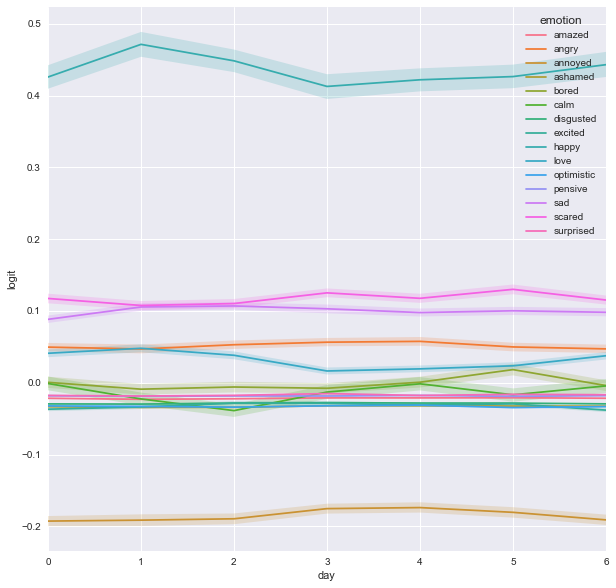

In [17]:
plt.figure(figsize=(10, 10))
ax = sns.tsplot(time='day', value='logit',
                unit='post', condition='emotion',
                data=df_week)
plt.show()